In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import seaborn as sns

In [2]:
#first import your levels csv (perhaps at level5)
#M1 = pd.read_csv("/home/diana/qbb2/tables/dada2/11/extractbarplot11/data/level-5.csv")
M2 = pd.read_csv("/Users/Diana/BB-raw/bb-16/summer2019/dada2/truncq/11/extractbarplot11/data/level-5.csv")
M3 = pd.read_csv("/Users/Diana/BB-raw/bb-16/summer2019/dada2/chimera_removal/20/7d0fb5a0-813d-4018-aa59-9f32a22f3fe3/data/level-5.csv")
M4 = pd.read_csv("/Users/Diana/BB-raw/bb-16/summer2019/dada2/chimera_removal/11/extractbarplot11/data/level-5.csv")

In [3]:
#remove the metadata from the tables
#M1 = M1.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])
M2 = M2.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])
M3 = M3.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])
M4 = M4.drop(columns = ['index','investigation_id','date','week','week_plus_year','depth','depth_code','name'])


In [4]:
#sum each rows to get total # of tax
#M1 = M1.sum().to_frame().rename(columns={0:'M1'})
M2 = M2.sum().to_frame().rename(columns={0:'M2'})
M3 = M3.sum().to_frame().rename(columns={0:'M3'})
M4 = M4.sum().to_frame().rename(columns={0:'M4'})

In [5]:
#merge each column
#M1_2 = M1.merge(M2, how='outer', left_index = True, right_index = True)
M1_2_3 = M2.merge(M3, how='outer', left_index = True, right_index = True)
M1_2_3_4 = M1_2_3.merge(M4, how='outer', left_index = True, right_index = True)

#replace Nan by 0
Method = M1_2_3_4.fillna(0)

In [6]:
Method = Method.transpose()

In [7]:
#make it into a distance matrix
distance_matrix = squareform(pdist(Method.values))

In [8]:
distance_matrix = pd.DataFrame(data=distance_matrix)

In [9]:
distance_matrix

,0,1,2
0,0.000000,435429.145087,0.000000
1,435429.145087,0.000000,435429.145087
2,0.000000,435429.145087,0.000000


<AxesSubplot:>

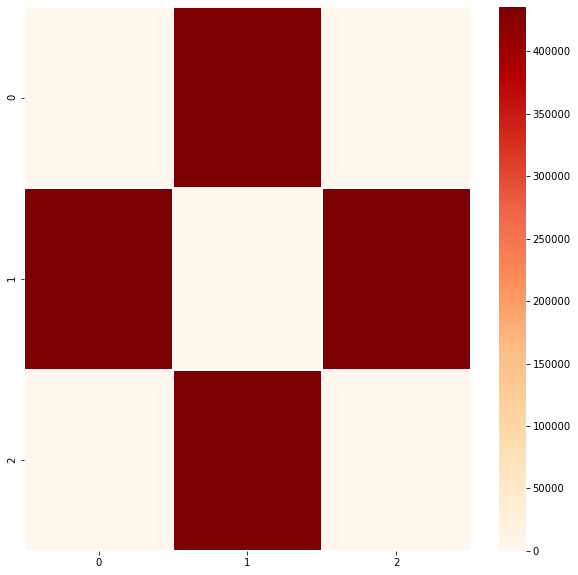

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(
    distance_matrix,
    cmap='OrRd',
    linewidth=1
)

In [11]:
pca = PCA(n_components=2)
X2d = pca.fit_transform(distance_matrix)

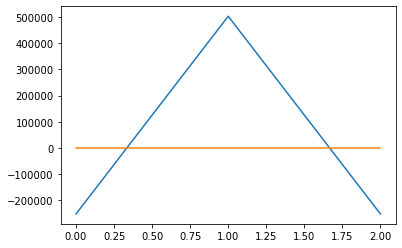

In [12]:
plt.plot(X2d)

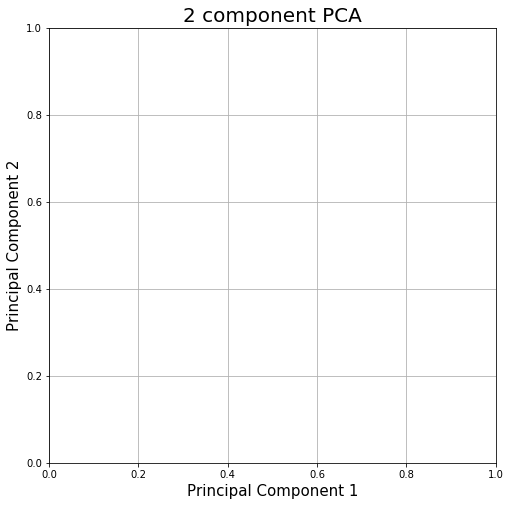

In [106]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.grid()

In [20]:
R = np.array (distance_matrix)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[array([[     0.        , 920109.36244557, 981435.7167818 ,
        480456.30145831]]), array([[920109.36244557,      0.        , 147853.91457449,
        456072.75448661]]), array([[981435.7167818 , 147853.91457449,      0.        ,
        502657.45498102]]), array([[480456.30145831, 456072.75448661, 502657.45498102,
             0.        ]])]


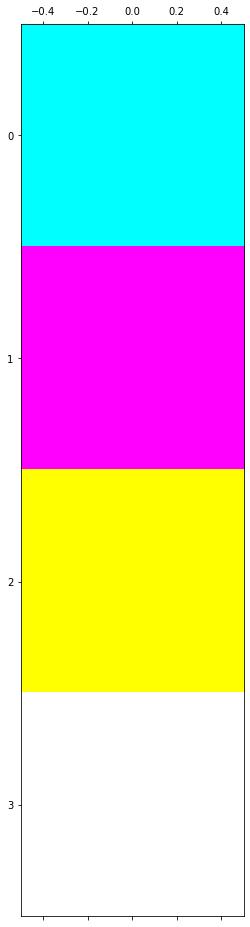

In [23]:
C = np.split(R, 4)
print(C)
matshow(C,cmap=cm.gray)
plt.show()

In [ ]:
import plotly.express as px
df = px.data.tips()

fig = px.density_heatmap(pca_plot, x="total_bill", y="tip")
fig.show()